# Denoising Filters

 ## Linear filters and non-linear filters.
 - Gaussian is an example of linear filter. 
 - Non-linear filters preserve edges. 
    - Median filter is an example of non-linear filter. 
        - The algorithm selects the median value of all the pixels in the selected window
## Famous filter:
- NLM: https://scikit-image.org/docs/dev/auto_examples/filters/plot_nonlocal_means.html


Bhattiprolu, S. (2023). python_for_microscopists. GitHub. https://github.com/bnsreenu/python_for_microscopists/blob/master/96- 096_What is Gaussian denoising.py

## Gaussian Filters

Summing up the values of Gaussian filter we get 1, this is done to preserve the energy of the image

- Applying a Gaussian filter is used to remove noise from an image:
    - However is not always the good method
    - In general, when I choose a kernel with a small size, it can be useful since there is a minimal loss of information, but with larger kernel may have lose of information from the blurring effect
    - Therefore, the Gaussian filter is now usually used if edge preservation or texture information is useful

(7, 7)


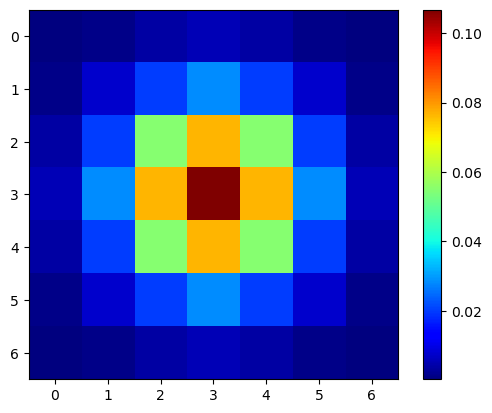

In [10]:
import numpy 
from matplotlib import pyplot as plt

### this is a 2d filter --> a 2d gaussian!
### if size = 3, it creates 7 values for each row, since goes from -3 to 3 including the 0
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = numpy.mgrid[-size:size+1, -size_y:size_y+1]
    g = numpy.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()
 
## also looking at the heatmaps we see values closer to the center are higher
gaussian_kernel_array = gaussian_kernel(3)
print(gaussian_kernel_array.shape)
plt.imshow(gaussian_kernel_array, cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()

In [1]:
import cv2
import numpy as np
from skimage import io, img_as_float,img_as_ubyte
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [2]:
### Let's load the images
#### converting the images to a gray image (so only one channel) and with the type float
##### The conversion is needed since many libraries for image processing need this conversion
img_gaussian_noise = img_as_float(io.imread('.\BSE_25sigma_noisy.jpg', as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread('.\BSE_salt_pepper.jpg', as_gray=True))

Check the images shapes

In [3]:
img_gaussian_noise.shape

(714, 901)

In [4]:
img_salt_pepper_noise.shape

(714, 901)

In [5]:
# showing using cv2 is not possible in a jupyter notebook
##cv2.imshow("Original", img_gaussian_noise)
##cv2.waitKey(0)  # Wait indefinitely until a key is pressed
##cv2.destroyAllWindows()  # Close the window after a key is pressed

### Let's look at the images with the gaussian noise
- Zooming in we can see the noise in the areas

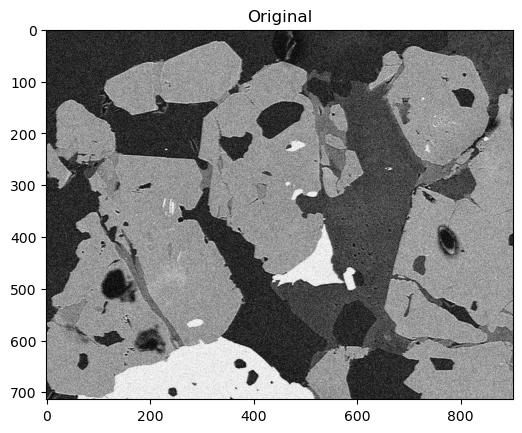

In [6]:
plt.imshow(img_gaussian_noise, cmap='gray')
plt.title("Original")
plt.show()

### Let's use the cv2_GaussianBlur method
- BORDER_CONSTANT - Pad the image with a constant value (i.e. black or 0)
- BORDER_REPLICATE: The row or column at the very edge of the original is replicated to the extra border.

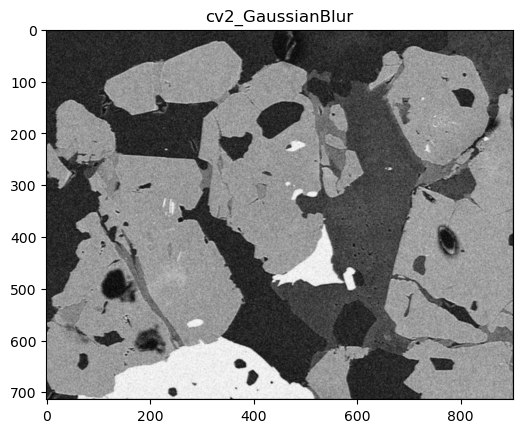

In [7]:
gaussian_using_cv2 = cv2.GaussianBlur(img_gaussian_noise, (3,3), 0, borderType=cv2.BORDER_CONSTANT)
gaussian_using_cv2 =img_as_ubyte(gaussian_using_cv2)

cv2.imwrite('saved_gaussian_using_cv2.jpg', gaussian_using_cv2)

plt.imshow(gaussian_using_cv2, cmap='gray')
plt.title("cv2_GaussianBlur")
plt.show()

### Let's use the skimage
#### the difference is that here i set the sigma value, while in the cv2 i set the kernel size and the sigma is computed from there

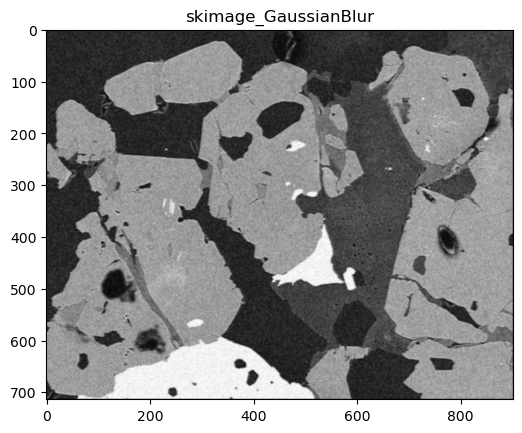

In [8]:
gaussian_using_skimage = gaussian(img_gaussian_noise, sigma=1, mode='constant', cval=0.0)
gaussian_using_skimage = img_as_ubyte(gaussian_using_skimage )

io.imsave('saved_gaussian_using_skimage.jpg', gaussian_using_skimage)
plt.imshow(gaussian_using_skimage, cmap='gray')
plt.title("skimage_GaussianBlur")
plt.show()

# Let's compare the 3 different denoising filters

In [13]:
img = img_as_float(io.imread("./noisy_img.jpg"))

## Check the shape

In [14]:
img.shape

(522, 265, 3)

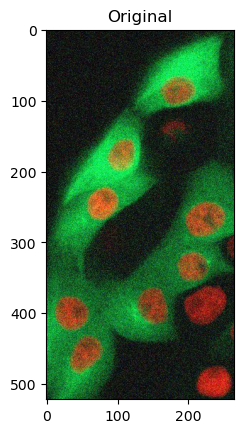

In [18]:
plt.imshow(img)
plt.title("Original")
plt.show()

### let's apply the gaussian filter

In [27]:
from scipy import ndimage as nd

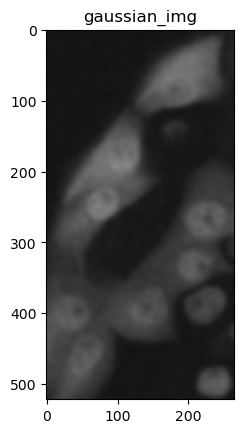

In [17]:
gaussian_img = nd.gaussian_filter(img, sigma=3)
plt.imshow(gaussian_img)
plt.title("gaussian_img")
plt.show()

### Resutts:
- The noise in the black areas is better
- Clearly the info about the edges are not preserved

# Median Filter

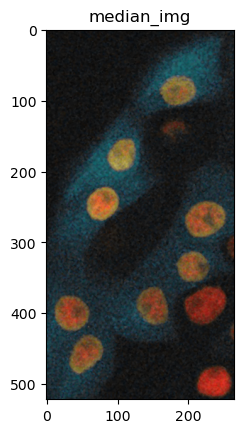

In [19]:
median_img = nd.median_filter(img, size=3)
plt.imshow(median_img)
plt.title("median_img")
plt.show()

### Results
- here the edges are preserved well
- still some noise in the black areas with size = 3

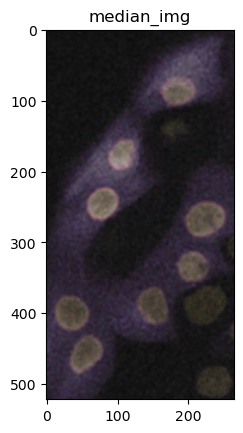

In [20]:
median_img = nd.median_filter(img, size=5)
plt.imshow(median_img)
plt.title("median_img")
plt.show()

### Results:
- less noise but worse edges
- so i would go with size = 3

# Non-local means denoising

In [21]:
from skimage.restoration import denoise_nl_means, estimate_sigma

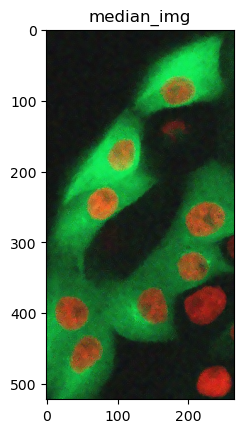

In [26]:
sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))

patch_kw = dict(patch_size=5,      
                patch_distance=3,  
               channel_axis=-1)

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, channel_axis=-1)

plt.imshow(denoise_img)
plt.title("median_img")
plt.show()

### Results:
- it's clearly the better in terms of edges and reduction of noise (zooming in)

# Histogram based image segmentation in python

## Objective:
- the process of defining grey level ranges for each feature of interest to perform segmentation

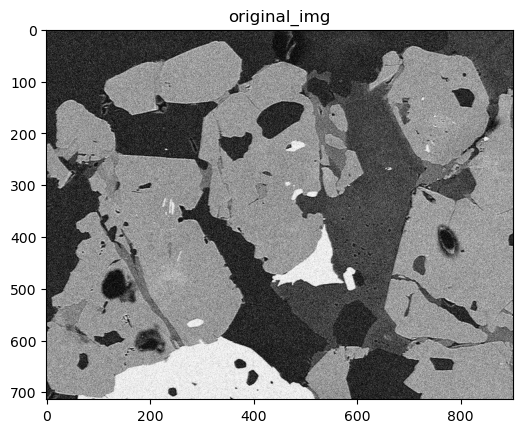

In [2]:
img = img_as_float(io.imread("./BSE_Google_noisy.jpg",as_gray=True))
plt.imshow(img,cmap = plt.cm.gray)
plt.title("original_img")
plt.show()

###  Let's check the shape

In [3]:
img.shape

(714, 901)

## Let's apply the best denoise filter that keeps the edges preserved

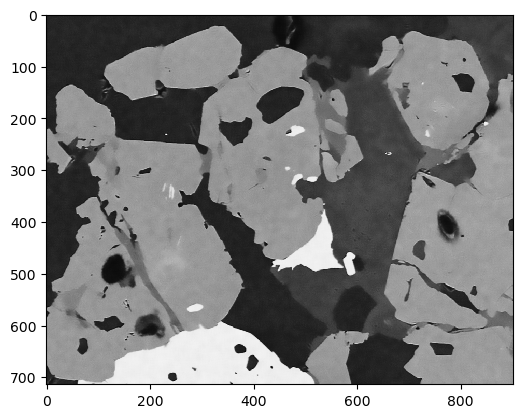

In [5]:
from skimage.restoration import denoise_nl_means, estimate_sigma
sigma_est = np.mean(estimate_sigma(img))

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6  # 13x13 search area
               )

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
               **patch_kw)

denoise_img_as_8byte = img_as_ubyte(denoise_img)
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')


In [6]:
denoise_img_as_8byte.max()

251

### Let's plot the intensity histogram

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  56.1 ,  58.65,
         61.2 ,  63.75,  66.3 ,  68.85,  71.4 ,  73.95,  76.5 ,  79.05,
         81.6 ,  84.15,  86.7 ,  89.25,  91.8 ,  94.35,  96.9 ,  99.45,
        102.  , 104.55, 107.1 , 109.65, 112.2 , 114.75, 117.3 , 119.85,
        122.4 , 124.95, 127.5 , 130.05, 132.6 , 135.15, 137.7 , 140.25,
        142.8 , 145.35, 147.9 , 150.45, 153.  , 155.55, 158.1 , 160.65,
        163.2 , 165.75, 168.3 , 170.85, 173.4 , 175.95, 178.5 , 181.05,
        183.6 , 186.15, 188.7 , 191.25, 193.8 , 196.35, 198.9 , 201.45,
        204.  , 206.55, 209.1 ,

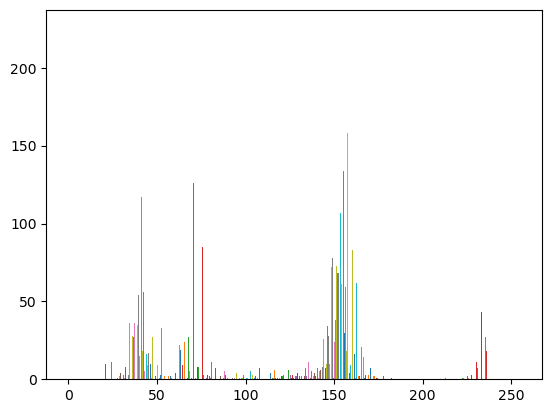

In [7]:
plt.hist(denoise_img_as_8byte, bins=100, range=(0,255))  #.flat returns the flattened numpy array (1D)
plt.show()

### Now i can segment using the intensities

In [8]:
segm1 = (denoise_img_as_8byte <= 57)
segm2 = (denoise_img_as_8byte > 57) & (denoise_img_as_8byte <= 110)
segm3 = (denoise_img_as_8byte > 110) & (denoise_img_as_8byte <= 210)
segm4 = (denoise_img_as_8byte > 210)

## Let's plot it using a RGB image

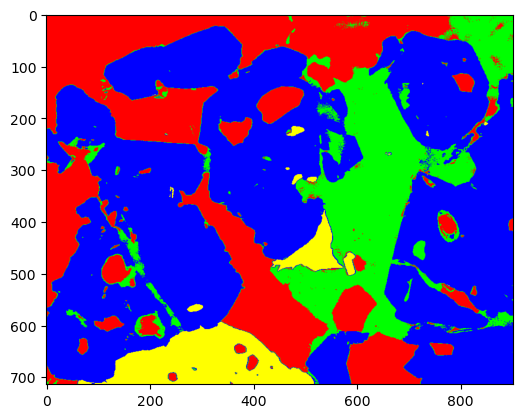

In [10]:
all_segments = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0) # RED
all_segments[segm2] = (0,1,0) # Green
all_segments[segm3] = (0,0,1) # Blue
all_segments[segm4] = (1,1,0) # Yellow
plt.imshow(all_segments)

## Let's compare it

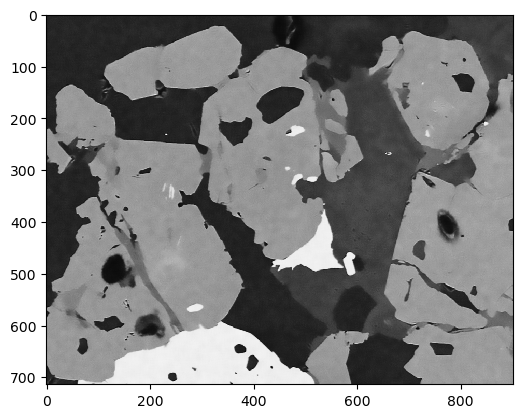

In [12]:
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest')

## Results
- Lot of yellow dots, red dots and stray dots. 
- how to clean
    - We can use binary opening and closing operations. 
    - Open takes care of isolated pixels within the window
    - Closing takes care of isolated holes within the defined window


Objective:

- Binary Opening: Primarily used to remove small objects or noise from the foreground (white pixels) while preserving the size and shape of larger objects. It can also disconnect objects that are lightly touching or close to each other.
- Binary Closing: Used to fill small holes or gaps in the foreground and connect nearby objects while maintaining the overall shape of larger objects.

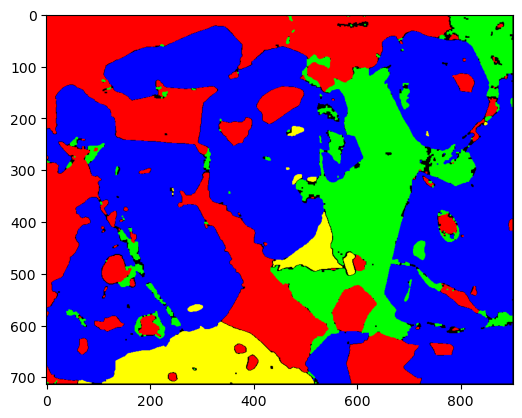

In [14]:
from scipy import ndimage as nd

segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

segm3_opened = nd.binary_opening(segm3, np.ones((3,3)))
segm3_closed = nd.binary_closing(segm3_opened, np.ones((3,3)))

segm4_opened = nd.binary_opening(segm4, np.ones((3,3)))
segm4_closed = nd.binary_closing(segm4_opened, np.ones((3,3)))

all_segments_cleaned = np.zeros((denoise_img_as_8byte.shape[0], denoise_img_as_8byte.shape[1], 3)) #nothing but 714, 901, 3

all_segments_cleaned[segm1_closed] = (1,0,0)
all_segments_cleaned[segm2_closed] = (0,1,0)
all_segments_cleaned[segm3_closed] = (0,0,1)
all_segments_cleaned[segm4_closed] = (1,1,0)

plt.imshow(all_segments_cleaned)  

## Results:
- really good segmentation of the chosen features
- not need to use more advanced models if the features are in this way separable

## Random Walker segmentation

The problem is that no always is possible, for example if the background is noisy

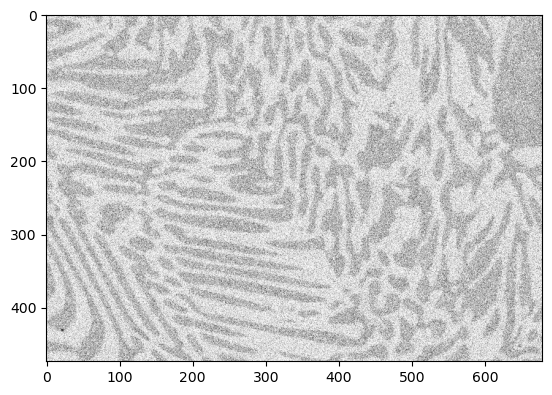

In [20]:
img = img_as_float(io.imread("./Alloy_noisy.jpg"))
plt.imshow(img,cmap=plt.cm.gray)

In [18]:
img.shape

(474, 679)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        1.1000e+01, 1.0000e+01, 1.4000e+01, 1.3000e+01, 2.4000e+01,
        3.0000e+01, 3.7000e+01, 5.8000e+01, 6.1000e+01, 1.2800e+02,
        1.6800e+02, 1.7200e+02, 2.7000e+02, 2.5100e+02, 5.1000e+02,
        4.0800e+02, 6.5500e+02, 6.0300e+02, 1.0460e+03, 8.5500e+02,
        1.4790e+03, 1.7840e+03, 1.3940e+03, 2.5320e+03, 2.0030e+03,
        3.4760e+03, 2.6180e+03, 4.4520e+03, 3.3800e+03, 5.5410e+03,
        6.1280e+03, 4.5680e+03, 7.4770e+03, 5.46

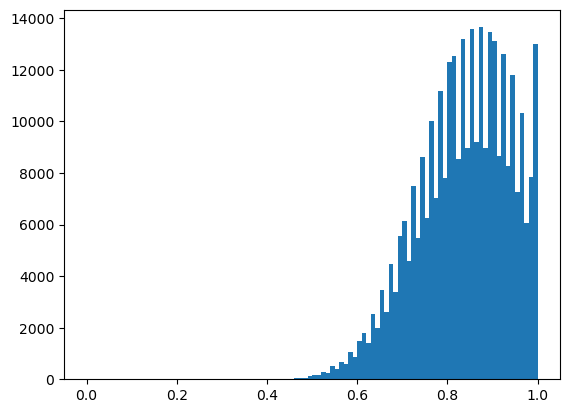

In [22]:
## first step is to look at the histogram
## if this looks great i dont need sth more complex
plt.hist(img.flat, bins=100, range=(0, 1)) 
plt.show()


### Results:
- Terrible histogram cause in the images we see clearly two regions but in the histogram no indication

### Let's remove some noise keeping the edges preserved to improve the histogram

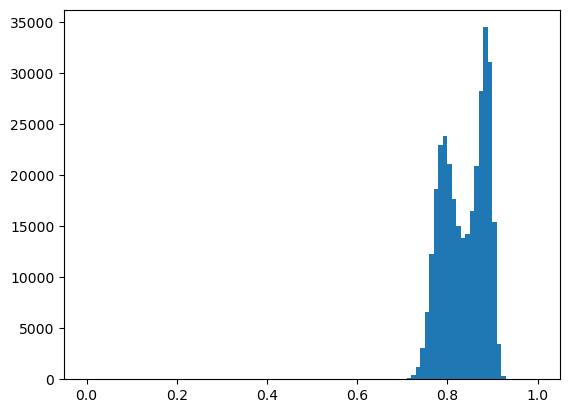

In [33]:
from skimage.restoration import denoise_nl_means, estimate_sigma
sigma_est = np.mean(estimate_sigma(img))
denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3)
flattened_hist = denoise_img.flat                          
plt.hist(flattened_hist, bins=100, range=(0, 1))
plt.show()

### Results
- better than before (there are 2 peaks), but still not enough since they are close enough
- let's try sth else: histogram equalization

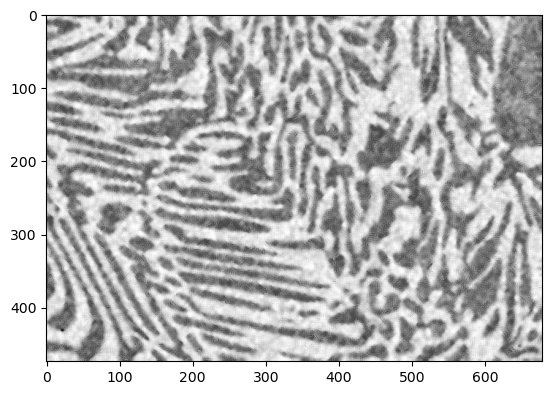

In [27]:
from skimage import exposure 

# eq_img = exposure.equalize_hist(denoise_img) # tends to be more aggressive
eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')

### Results:
- seems to be more distinguishble

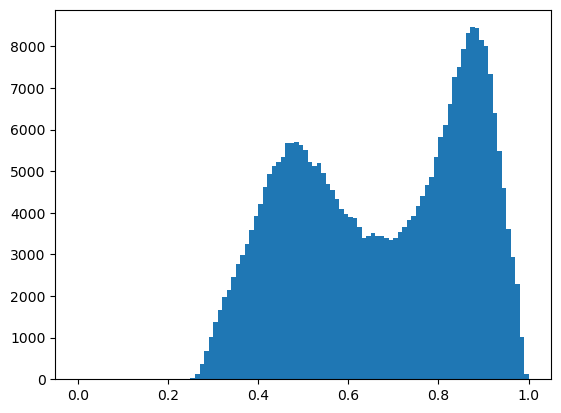

In [32]:
plt.hist(eq_img.flat, bins=100, range=(0., 1))
plt.show()

### Results:
- Better than before
- However is not enough for histogram segmentation

## Now let's proceed with the random walker alg

Random walker segmentation:
- Random walker segmentation is a technique used in image processing to segment images into different regions. It is particularly effective in segmenting images where the object boundaries are not clearly defined. 
- The algorithm is based on graph theory, where the image is considered as a graph, and the segmentation problem is solved as a graph labeling problem using random walks.

- Random Walks: The core idea of the random walker algorithm is to compute the probability that a random walker starting at a non-labeled pixel will first reach one of the pre-labeled marker pixels. The algorithm calculates these probabilities for each non-labeled pixel to reach each marker. A pixel is assigned to the segment of the marker with the highest probability.

- Segmentation: After computing the probabilities, each non-marker pixel is assigned to the label of the marker with the highest probability of a random walk originating from that pixel reaching the marker first. This step effectively segments the image into regions based on the likelihood of connectivity to the different markers.

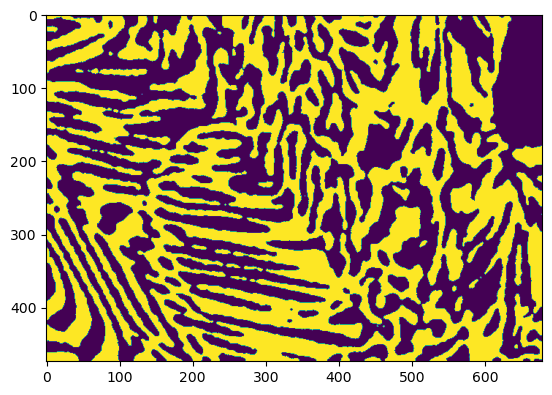

In [35]:
from skimage.segmentation import random_walker
## Now we have a more distinguishble image in term of intensities
## we can use it to get the seeds for applying the random walk (seeds = ground truth) since we can confidently distinguish!
markers = np.zeros(img.shape, dtype=np.uint)

markers[(eq_img < 0.6) & (eq_img > 0.3)] = 1
markers[(eq_img > 0.8) & (eq_img < 0.99)] = 2

labels = random_walker(eq_img, markers, beta=10, mode='bf')
plt.imshow(labels)
plt.show()

### Lets compare

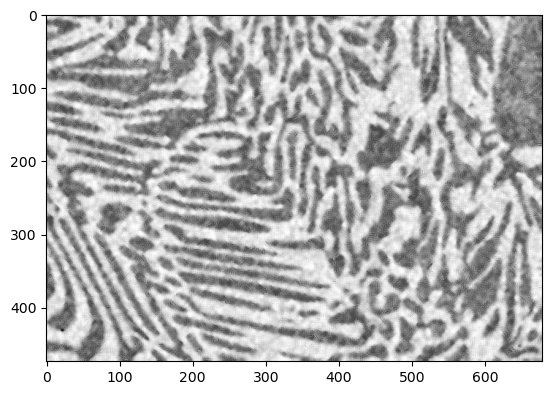

In [36]:
# eq_img = exposure.equalize_hist(denoise_img) # tends to be more aggressive
eq_img = exposure.equalize_adapthist(denoise_img)
plt.imshow(eq_img, cmap='gray')

### Results:
- quite good except for small details

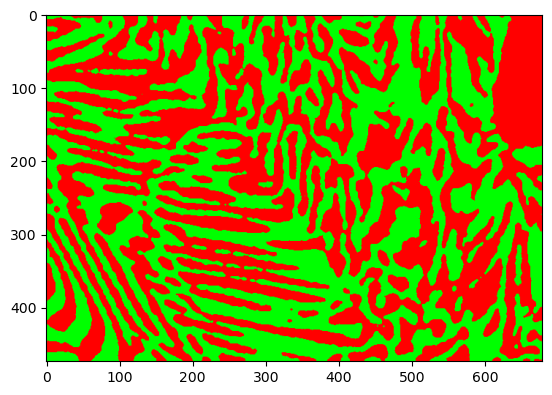

In [38]:
## as before i create a new image filled with two colors!
segm1 = (labels == 1)
segm2 = (labels == 2)
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (1,0,0)
all_segments[segm2] = (0,1,0)

plt.imshow(all_segments)
plt.show()

## Denoising and edge detection using opencv in Python

In [42]:
img = cv2.imread('./BSE_Google_noisy.jpg', 1) ## read as RGB with 1
img.shape

(714, 901, 3)

In [47]:
kernel = np.ones((5,5),np.float32)/25 ## the sum is up to 1 to preserve the energy
filt_2D = cv2.filter2D(img,-1,kernel)  

blur = cv2.blur(img,(5,5))   #Convolution with a normalized filter. Same as above for this example.
blur_gaussian = cv2.GaussianBlur(img,(5,5),0)  #Gaussian kernel is used. 
median_blur = cv2.medianBlur(img,5)  #Using kernel size 5. Better on edges compared to gaussian.
bilateral_blur = cv2.bilateralFilter(img,9,75,75)  #Good for noise removal but retain edge sharpness. 


In [52]:
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(blur)
plt.subplot(2,2,1)
plt.imshow(blur_gaussian)
plt.subplot(2,2,2)
plt.imshow(bilateral_blur)
plt.subplots_adjust(wspace=0.5)


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>